In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
TD = pd.read_table('data/newsgroups5/matrix.txt',delimiter=',',header=None)
terms = pd.read_table('data/newsgroups5/terms.txt',delimiter=',',header=None)

classes = np.genfromtxt('data/newsgroups5/classes.txt',delimiter=' ', dtype=int, skip_header=1, usecols=(1))


In [30]:
print('\n TD ',TD.shape,'\n terms ',terms.shape,'\n classes ',classes.shape)


 TD  (9328, 2500) 
 terms  (9328, 1) 
 classes  (2500,)


In [7]:
TD.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [460]:
classes.head()

,0,1,2,3,4
0,% Five Categories: windows (0),crypt (1),christian (2),hockey (3),forsale (4)
1,0 0,NaN,NaN,NaN,NaN
2,1 1,NaN,NaN,NaN,NaN
3,2 1,NaN,NaN,NaN,NaN
4,3 1,NaN,NaN,NaN,NaN


In [461]:
dataMat = np.mat(matrix.T)
dataMat.shape

(2500, 9328)

### a. Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [44]:
def calculateEuclideanDistance(x,D):
    dist = np.sqrt((D -x)**2).sum(axis=1)
    return dist

def calculateCosineSimilarityDistance(x,D):
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dist = 1 - sims
    
    return dist



### b. Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [316]:
matrix = pd.read_table('data/newsgroups5/matrix.txt',delimiter=',',header=None)
terms = pd.read_table('data/newsgroups5/terms.txt',delimiter=',',header=None)
classes = np.genfromtxt('data/newsgroups5/classes.txt',delimiter=' ', dtype=int, skip_header=1, usecols=(1))


In [118]:
matrixT = matrix.T


In [119]:
print('\n matrix ',matrix.shape,'\n terms ',terms.shape,'\n classes ',classes.shape," matrixT ",matrixT.shape)


 matrix  (9328, 2500) 
 terms  (9328, 1) 
 classes  (2500,)  matrixT  (2500, 9328)


In [422]:
matrix.describe()

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
count,2.50e+03,2.50e+03,2500.00,2.50e+03,2500.00,2.50e+03,2500.00,2.50e+03,2500.00,2500.00,...,2.50e+03,2.50e+03,2.50e+03,2.50e+03,2.50e+03,2.50e+03,2500.00,2.50e+03,2.50e+03,2.50e+03
mean,6.40e-03,2.40e-03,0.03,4.80e-03,0.01,4.00e-03,0.02,1.60e-03,0.03,0.08,...,5.20e-03,6.40e-03,1.60e-03,7.60e-03,2.80e-03,3.20e-03,0.02,4.40e-03,2.40e-03,6.00e-03
std,1.38e-01,4.89e-02,0.95,8.47e-02,0.23,6.92e-02,0.25,4.90e-02,0.24,0.35,...,1.04e-01,1.88e-01,4.90e-02,1.95e-01,8.72e-02,6.92e-02,0.52,1.66e-01,8.48e-02,1.56e-01
min,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00
25%,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00
50%,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00
75%,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00
max,6.00e+00,1.00e+00,47.00,2.00e+00,9.00,2.00e+00,7.00,2.00e+00,6.00,4.00,...,3.00e+00,7.00e+00,2.00e+00,8.00e+00,3.00e+00,2.00e+00,20.00,8.00e+00,4.00e+00,5.00e+00


In [423]:
 matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Columns: 9328 entries, 0 to 9327
dtypes: int64(9328)
memory usage: 177.9 MB


In [348]:
classes.shape

(2500,)

In [368]:
vs_matrix = np.mat(matrix)
vs_matrix.shape

(9328, 2500)

In [413]:
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(matrixT, classes, test_size=0.2, random_state=33)


In [414]:
print("train : ",vs_train.shape)
print("Test : ",vs_test.shape)


train :  (2000, 9328)
Test :  (500, 9328)


#### 2.c Perform Kmeans clustering on the training data

In [415]:
## get random centroids
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k)
    return centroids

In [416]:
%%time
data = np.mat(vs_train)
#centroids = randCent(vs_train,2)

Wall time: 15 ms


In [417]:
centroids

array([[0.  , 0.  , 0.  , ..., 1.21, 0.  , 0.  ],
       [0.03, 0.  , 0.57, ..., 0.03, 0.01, 0.07],
       [0.  , 0.08, 0.02, ..., 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.07, ..., 0.  , 0.  , 0.  ],
       [0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [418]:
def kmeans(D,k,distMeas=calculateCosineSimilarityDistance,createCentroid = randCent):
    m = np.shape(D)[0]
    
    ## cluster assignment matrix with 2 cols. one for cluster index and 2nd one for cluster error (distance from cluster centroid to the current point)
    clusterAssment = np.mat(np.zeros((m,2)))
    
    print('calculating centroids : Start')
    centroids = createCentroid(D,k)
    print('calculating centroids : End','\n centroids are :: \n',centroids)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        ## loop over data points and assign assign it to the closest centroid
        for i in range(m):
            minDIst = np.inf;
            minIndex = -1;
            for j in range(k):
                distJI = distMeas(centroids[j,:],D[i,:])
                ##print('Distance ',distJI)
                if(distJI < minDIst):
                    minDIst = distJI;
                    minIndex = j;
            if clusterAssment[i,0] !=minIndex : clusterChanged = True
            clusterAssment[i,:] = minIndex, minDIst**2
        #print(" centroids : ",centroids)
        
        ## update the centroid
        for cent in range(k):
            ptsInClust = D[np.nonzero(clusterAssment[:,0] == cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust,axis=0)
    return centroids, clusterAssment

In [419]:
%%time
data = np.mat(vs_train)
centroids, clusterAssment = kmeans(data,5)

calculating centroids : Start
calculating centroids : End 
 centroids are :: 
 [[ 0.22  0.3   6.04 ...  0.74  0.48  1.42]
 [ 0.97  0.83 33.22 ...  1.16  0.44  2.42]
 [ 0.55  0.27 38.5  ...  0.68  0.89  2.05]
 [ 0.17  0.44 39.48 ...  0.57  0.05  2.78]
 [ 0.61  0.08 11.17 ...  1.12  0.12  0.58]]


M:\apps\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
M:\apps\Anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-418-e4a2d4a73a0a>:20: RuntimeWarning: invalid value encountered in less
  if(distJI < minDIst):


Wall time: 3min 19s


In [424]:
def cluster_report(data, clusters, centroids):
    clustersDF = pd.DataFrame(clusters)
    term_list = pd.Series(terms[0], name='Term')
    
    cluster_labels = np.unique(clustersDF[0])
    result = {}
    size ={}
    for c in cluster_labels:
        c = int(c)
        
        cl_data = vs_train.index[clustersDF[0]==c]

        # gen centroids/frequency for the current (ith) cluster
        centroid = pd.Series(centroids[c], name='Freq')

        cl_size = len(cl_data)
        size[c] = cl_size
        
        ## doc by term
        docs_from_cluster = vs_train[vs_train.index.isin(cl_data)]

        ## term by doc
        docs_from_cluster = docs_from_cluster.T

        ## count all non zero terms
        DF = (pd.DataFrame([(docs_from_cluster==0).sum(1)]).T)/size[c]

        ## divide each term count by number of docs in cluser
        
        DF.columns=['DF']
        
        DF_PERCENT = DF/size[c]
        DF_PERCENT = DF_PERCENT * 100
        DF_PERCENT.columns=['% of Docs']
        ##print("docs_from_cluster \n",docs_from_cluster)


        term_centroid = pd.concat([term_list, centroid,DF,DF_PERCENT],axis=1)
        result[c] = term_centroid
    return result , size

def display_clusters(clusterDict, clusterSize, numTerms):
    for c in clusterDict.keys():
        cluster_rep = clusterDict[c]
        print("\nCluster ", c, "size =", clusterSize[c])
        print("----------------------------------------------")
        print(cluster_rep.sort_values(by="DF", ascending=False).head(numTerms))
    return


In [425]:
vs_train = pd.DataFrame(vs_train)
clusterDict_nonidf , clusterSize_nonidf = cluster_report(vs_train,clusterAssment,centroids)
print(clusterSize_nonidf)
print(clusterDict_nonidf.keys())

numTerms = 10
display_clusters(clusterDict_nonidf,clusterSize_nonidf,numTerms)

{0: 1984, 1: 6, 2: 10}
dict_keys([0, 1, 2])

Cluster  0 size = 1984
----------------------------------------------
       Term  Freq   DF  % of Docs
9327     zz   0.0  1.0       0.05
6965  rnair   0.0  1.0       0.05
8273     tl   0.0  1.0       0.05
8271     tk   0.0  1.0       0.05
4328     jx   0.0  1.0       0.05
4329     jz   0.0  1.0       0.05
5905    ovg   0.0  1.0       0.05
5886   ovei   0.0  1.0       0.05
4351    kat   0.0  1.0       0.05
4355     kd   0.0  1.0       0.05

Cluster  1 size = 6
----------------------------------------------
             Term  Freq   DF  % of Docs
0              aa   0.0  1.0      16.67
6152        pilot   0.0  1.0      16.67
6146        pierr   0.0  1.0      16.67
6147  pietrangelo   0.0  1.0      16.67
6148          pif   0.0  1.0      16.67
6149          pig   0.0  1.0      16.67
6150        pihko   0.0  1.0      16.67
6151        pilat   0.0  1.0      16.67
6153          pim   0.0  1.0      16.67
6144          pie   0.0  1.0      16.67

Cl

In [ ]:
## Repeating the above with DT_IDF

In [426]:
DT = TD.T
DT

numTerms=TD.shape[0]
NDocs = TD.shape[1]

print("numTerms ",numTerms," NDocs ",NDocs)

# Note: doc frequency (df) for a term t is the number of docs in which t appears divided by total number of docs

# first let's find the doc counts for each term

DF = pd.DataFrame([(TD!=0).sum(1)]).T
print(DF.shape)

# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(TD), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, np.array(DF)))

np.set_printoptions(precision=2,suppress=True)
print(IDF)

pd.set_option("display.precision", 2)

# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = TD * IDF

print("TD_tfidf",TD_tfidf)

DT_tfidf = TD_tfidf.T
DT_tfidf = np.mat(DT_tfidf)

print("DT_tfidf.shape :",DT_tfidf.shape)

numTerms  9328  NDocs  2500
(9328, 1)
[[2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 ...
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]]
[[7.97 7.97 7.97 ... 7.97 7.97 7.97]
 [8.7  8.7  8.7  ... 8.7  8.7  8.7 ]
 [6.83 6.83 6.83 ... 6.83 6.83 6.83]
 ...
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.29 9.29 9.29 ... 9.29 9.29 9.29]]
TD_tfidf       0     1     2     3     4     5     6     7     8     9     ...  2490  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

In [427]:
from sklearn.model_selection import train_test_split
vs_train_df, vs_test_idf, vs_target_train_idf, vs_target_test_idf = train_test_split(DT_tfidf, classes, test_size=0.2, random_state=33)


In [428]:
print("vs_train_df : ",vs_train_df.shape)
print("vs_test_idf : ",vs_test_idf.shape)


vs_train_df :  (2000, 9328)
vs_test_idf :  (500, 9328)


In [429]:
%%time
data = np.mat(vs_train_df)
centroids, clusterAssment = kmeans(data,5)

calculating centroids : Start
calculating centroids : End 
 centroids are :: 
 [[  0.42   6.65 116.56 ...  19.03   4.63   3.58]
 [  6.9    3.02  48.41 ...   9.84   0.18  15.48]
 [  0.49   5.8  159.4  ...   2.86   4.34  17.97]
 [  4.8    2.17  82.38 ...  14.36   9.65  25.16]
 [  7.16   4.63  88.83 ...   1.61   8.36  31.05]]


M:\apps\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
M:\apps\Anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-418-e4a2d4a73a0a>:20: RuntimeWarning: invalid value encountered in less
  if(distJI < minDIst):


Wall time: 4min 2s


In [430]:
vs_train_df = pd.DataFrame(vs_train_df)
clusterDict , clusterSize = cluster_report(vs_train_df,clusterAssment,centroids)
print(clusterSize)
print(clusterDict.keys())

numTerms = 10
display_clusters(clusterDict,clusterSize,numTerms)

{1: 789, 2: 1201, 3: 8, 4: 2}
dict_keys([1, 2, 3, 4])

Cluster  1 size = 789
----------------------------------------------
          Term  Freq   DF  % of Docs
9327        zz   0.0  1.0       0.13
3973   infecti   0.0  1.0       0.13
7796     steen   0.0  1.0       0.13
4000  injustic   0.0  1.0       0.13
3999    injuri   0.0  1.0       0.13
3998     injur   0.0  1.0       0.13
3997    inject   0.0  1.0       0.13
7798    stefan   0.0  1.0       0.13
3993   inherit   0.0  1.0       0.13
3992     inher   0.0  1.0       0.13

Cluster  2 size = 1201
----------------------------------------------
                   Term  Freq   DF  % of Docs
4664              lieft   0.0  1.0       0.08
801               bizwt   0.0  1.0       0.08
4899             mandel   0.0  1.0       0.08
784   binkleycsmcgillca   0.0  1.0       0.08
785                 bio   0.0  1.0       0.08
786                bird   0.0  1.0       0.08
7443            shutter   0.0  1.0       0.08
7439             shuffl   0.0 

### 2c pip install wordcloud or conda install -c conda-forge wordcloud 

In [431]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [402]:
?WordCloud

In [432]:
cluster_numbers = set(np.ravel(clusterAssment[:,0]))
terms_array = np.array(terms)
datClusMap = {}

t_list = list(terms_array.T[0])

# iterate through cluster
for i in cluster_numbers:
        ## get all docuemnts cor cluster# i
        dT = pd.DataFrame(vs_train[np.ravel(clusterAssment[:,0]==int(i))])
        # rename/attach name to the columns
        dT.columns = terms_array.T[0]
        
        ## evaluate the term frequency
        term_freq = list(np.array((dT.T!=0).sum(1).T))
        
        ## get the terms present in the clsuer documents i.e. for which value is not zero
        cluster_term_list=term_list[np.ravel(np.nonzero(term_freq))]
        
        # using list comprehension- concatenate all present terms/words into one giant string for word cloud
        cluster_terms = ' '.join(map(str, cluster_term_list)) 
        
        datClusMap['C'+str(int(i))] = cluster_terms

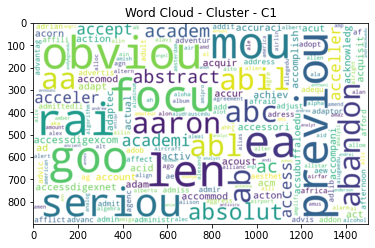

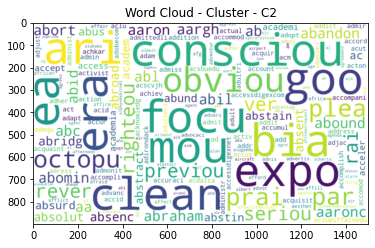

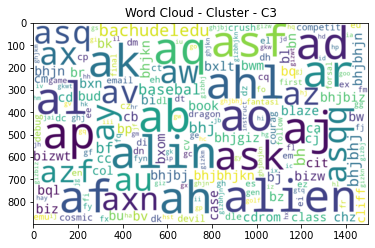

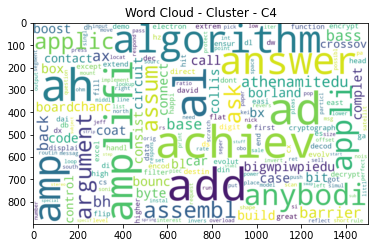

In [433]:
for key in datClusMap.keys():
    word_cloud_img = WordCloud(max_font_size=200, width=1500, height=900, background_color='white').generate(datClusMap.get(key))
    plt.imshow(word_cloud_img,interpolation="bilinear")
    plt.title('Word Cloud - Cluster - '+key)
    plt.show()

### 2d Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [434]:
vs_target_train

array([4, 0, 4, ..., 2, 0, 1])

In [435]:
clusterAssment.T[0]

matrix([[1., 1., 1., ..., 2., 1., 2.]])

In [436]:
from sklearn.metrics import completeness_score, homogeneity_score

#NOTE: this generates a random score every time you run the cluster
print("completeness_score = ",completeness_score(vs_target_train,np.ravel(clusterAssment.T[0])))
print("homogeneity_score = ",homogeneity_score(vs_target_train,np.ravel(clusterAssment.T[0])))

completeness_score =  0.7592534444006346
homogeneity_score =  0.3312944044800683


### 2e Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.

In [437]:
%%time
results = []

vs_test = np.array(vs_test)
for doc in vs_test:
    dic = {}
    sim = []
    cluster = 0
    for centroid in centroids:
        cluster += 1
        #print("d ",doc)
        val = np.ravel(calculateCosineSimilarityDistance(centroid,doc))[0]
        #print("val ",val)
        centroid_doc_sim = 1 - val #Need to subtract from 1 as our function returns distance and not similarity
        #print("centroid_doc_sim ",centroid_doc_sim)
        sim.append(centroid_doc_sim) 
        dic['Cosine Similarity to Cluster '+str(cluster)] = str(np.ravel(centroid_doc_sim)[0])
    dic['Predicted Cluster'] = sim.index(max(sim))+1
    results.append(dic)

test_cluster = pd.DataFrame(results)

<ipython-input-44-0b0ddf2a9119>:8: RuntimeWarning: divide by zero encountered in true_divide
  sims = np.dot(D,x)/(D_norm * x_norm)
<ipython-input-44-0b0ddf2a9119>:8: RuntimeWarning: invalid value encountered in true_divide
  sims = np.dot(D,x)/(D_norm * x_norm)


Wall time: 3min 41s


In [438]:
test_cluster

,Cosine Similarity to Cluster 1,Cosine Similarity to Cluster 2,Cosine Similarity to Cluster 3,Cosine Similarity to Cluster 4,Cosine Similarity to Cluster 5,Predicted Cluster
0,nan,inf,inf,inf,inf,1
1,nan,inf,inf,inf,inf,1
2,nan,inf,inf,inf,inf,1
3,nan,inf,inf,inf,inf,1
4,nan,inf,inf,inf,inf,1
...,...,...,...,...,...,...
495,nan,inf,inf,inf,inf,1
496,nan,inf,inf,inf,inf,1
497,nan,inf,inf,inf,inf,1
498,nan,inf,inf,inf,inf,1
